In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# import Keras Network lib
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, GRU

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../BTC-USD.csv')
df1=df.reset_index()['Close']
df1

FileNotFoundError: [Errno 2] No such file or directory: '../BTC-USD.csv'

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
34/34 [==============================] - 28s 271ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 2/100
34/34 [==============================] - 5s 146ms/step - loss: 7.6490e-05 - val_loss: 0.0019
Epoch 3/100
34/34 [==============================] - 6s 165ms/step - loss: 4.3078e-05 - val_loss: 0.0013
Epoch 4/100
34/34 [==============================] - 6s 170ms/step - loss: 4.1000e-05 - val_loss: 0.0013
Epoch 5/100
34/34 [==============================] - 6s 167ms/step - loss: 4.0657e-05 - val_loss: 0.0012
Epoch 6/100
34/34 [==============================] - 5s 139ms/step - loss: 3.8867e-05 - val_loss: 0.0012
Epoch 7/100
34/34 [==============================] - 5s 139ms/step - loss: 4.0085e-05 - val_loss: 0.0011
Epoch 8/100
34/34 [==============================] - 5s 142ms/step - loss: 3.8340e-05 - val_loss: 0.0011
Epoch 9/100
34/34 [==============================] - 6s 172ms/step - loss: 3.5255e-05 - val_loss: 0.0011
Epoch 10/100
34/34 [==============================] - 6s 1

34/34 [==============================] - 4s 123ms/step - loss: 2.0611e-05 - val_loss: 8.0933e-04
Epoch 77/100
34/34 [==============================] - 3s 92ms/step - loss: 2.2963e-05 - val_loss: 0.0011
Epoch 78/100
34/34 [==============================] - 3s 88ms/step - loss: 2.3078e-05 - val_loss: 8.3769e-04
Epoch 79/100
34/34 [==============================] - 3s 93ms/step - loss: 2.1231e-05 - val_loss: 9.0433e-04
Epoch 80/100
34/34 [==============================] - 3s 97ms/step - loss: 2.1757e-05 - val_loss: 9.9714e-04
Epoch 81/100
34/34 [==============================] - 3s 94ms/step - loss: 2.1425e-05 - val_loss: 0.0011
Epoch 82/100
34/34 [==============================] - 4s 111ms/step - loss: 2.0740e-05 - val_loss: 7.9948e-04
Epoch 83/100
34/34 [==============================] - 3s 100ms/step - loss: 1.9972e-05 - val_loss: 9.0980e-04
Epoch 84/100
34/34 [==============================] - 3s 99ms/step - loss: 2.0344e-05 - val_loss: 7.1333e-04
Epoch 85/100
34/34 [=================

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

7/7 [==============================] - 0s 15ms/step


In [ ]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred)
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 0.031
RMSE on validation set: 0.010
MAPE on test set: 0.036
MAPE on validation set: 0.019
The explained variance score (EVS) on test set: 0.976
The explained variance score (EVS) on validate set: 0.982


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.32708241 0.3196377  0.29952961 0.2969212  0.30352714 0.32625408
 0.35643099 0.36457095 0.35907873 0.36912237 0.40430839 0.39751124
 0.41343077 0.40940281 0.41546584 0.40257973 0.41781277 0.40533757
 0.40535867 0.41277272 0.40009342 0.40199644 0.41802747 0.4133549
 0.41995722 0.41895632 0.41581445 0.40974388 0.41535119 0.41549801
 0.41351187 0.41175666 0.41208217 0.41779909 0.43738589 0.44602351
 0.44459885 0.44845727 0.44974283 0.44726166 0.44721506 0.43430028
 0.4484348  0.42506483 0.41650714 0.40212672 0.41014869 0.4067933
 0.40581324 0.41742138 0.41912943 0.43472679 0.43274537 0.43138352
 0.43168503 0.41421566 0.42295553 0.42778975 0.42543627 0.43562601
 0.42628081 0.41960841 0.40832009 0.40779333 0.40724398 0.39802928
 0.39512377 0.39481345 0.3969883  0.40087701 0.39856144 0.40393552
 0.39552768 0.39638717 0.39994054 0.39436453 0.39581064 0.40136719
 0.38814676 0.39024487 0.39385206 0.39606404 0.41412779 0.40908597
 0.40843994 0.40127714 0.3953461  0.40172131 0.39913

7 day output [[0.34303883]]
8 day input [0.35907873 0.36912237 0.40430839 0.39751124 0.41343077 0.40940281
 0.41546584 0.40257973 0.41781277 0.40533757 0.40535867 0.41277272
 0.40009342 0.40199644 0.41802747 0.4133549  0.41995722 0.41895632
 0.41581445 0.40974388 0.41535119 0.41549801 0.41351187 0.41175666
 0.41208217 0.41779909 0.43738589 0.44602351 0.44459885 0.44845727
 0.44974283 0.44726166 0.44721506 0.43430028 0.4484348  0.42506483
 0.41650714 0.40212672 0.41014869 0.4067933  0.40581324 0.41742138
 0.41912943 0.43472679 0.43274537 0.43138352 0.43168503 0.41421566
 0.42295553 0.42778975 0.42543627 0.43562601 0.42628081 0.41960841
 0.40832009 0.40779333 0.40724398 0.39802928 0.39512377 0.39481345
 0.3969883  0.40087701 0.39856144 0.40393552 0.39552768 0.39638717
 0.39994054 0.39436453 0.39581064 0.40136719 0.38814676 0.39024487
 0.39385206 0.39606404 0.41412779 0.40908597 0.40843994 0.40127714
 0.3953461  0.40172131 0.39913243 0.39978444 0.37961832 0.40156095
 0.38831266 0.39071987

15 day output [[0.32206753]]
16 day input [0.41781277 0.40533757 0.40535867 0.41277272 0.40009342 0.40199644
 0.41802747 0.4133549  0.41995722 0.41895632 0.41581445 0.40974388
 0.41535119 0.41549801 0.41351187 0.41175666 0.41208217 0.41779909
 0.43738589 0.44602351 0.44459885 0.44845727 0.44974283 0.44726166
 0.44721506 0.43430028 0.4484348  0.42506483 0.41650714 0.40212672
 0.41014869 0.4067933  0.40581324 0.41742138 0.41912943 0.43472679
 0.43274537 0.43138352 0.43168503 0.41421566 0.42295553 0.42778975
 0.42543627 0.43562601 0.42628081 0.41960841 0.40832009 0.40779333
 0.40724398 0.39802928 0.39512377 0.39481345 0.3969883  0.40087701
 0.39856144 0.40393552 0.39552768 0.39638717 0.39994054 0.39436453
 0.39581064 0.40136719 0.38814676 0.39024487 0.39385206 0.39606404
 0.41412779 0.40908597 0.40843994 0.40127714 0.3953461  0.40172131
 0.39913243 0.39978444 0.37961832 0.40156095 0.38831266 0.39071987
 0.39030672 0.38097081 0.38229043 0.38173147 0.38197229 0.37018912
 0.36651018 0.362770

23 day output [[0.30577913]]
24 day input [0.41995722 0.41895632 0.41581445 0.40974388 0.41535119 0.41549801
 0.41351187 0.41175666 0.41208217 0.41779909 0.43738589 0.44602351
 0.44459885 0.44845727 0.44974283 0.44726166 0.44721506 0.43430028
 0.4484348  0.42506483 0.41650714 0.40212672 0.41014869 0.4067933
 0.40581324 0.41742138 0.41912943 0.43472679 0.43274537 0.43138352
 0.43168503 0.41421566 0.42295553 0.42778975 0.42543627 0.43562601
 0.42628081 0.41960841 0.40832009 0.40779333 0.40724398 0.39802928
 0.39512377 0.39481345 0.3969883  0.40087701 0.39856144 0.40393552
 0.39552768 0.39638717 0.39994054 0.39436453 0.39581064 0.40136719
 0.38814676 0.39024487 0.39385206 0.39606404 0.41412779 0.40908597
 0.40843994 0.40127714 0.3953461  0.40172131 0.39913243 0.39978444
 0.37961832 0.40156095 0.38831266 0.39071987 0.39030672 0.38097081
 0.38229043 0.38173147 0.38197229 0.37018912 0.36651018 0.36277047
 0.35919955 0.35575119 0.35241625 0.3491883  0.34606355 0.34303883
 0.34011096 0.3372768

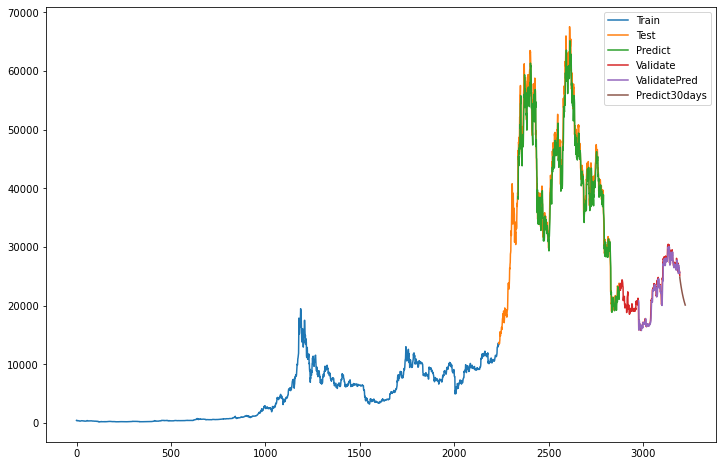

In [ ]:
# 14.Vẽ hình

plt.subplots(figsize=(12, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

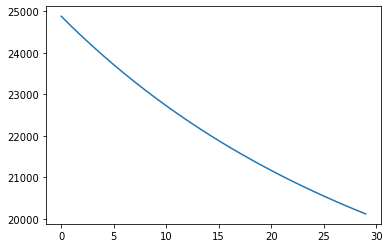

In [ ]:
plt.plot(scaler.inverse_transform(lst_output))